# Лабораторная работа по машинному обучению №3

ФИО: Лебедев Александр Сергеевич
Группа: 3821М1ПМвм

### Описание Датасета и задачи

#### Датасет
Датасет: [Link](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)
Датасет состоит из записей с информацией о продаваемых телефонах, их характеристики и стоймости. Стоймость поделена на диапозоны:
 - Низкая стоймость - 0
 - Средняя стоймость - 1
 - Высокая стоймость - 2
 - Очень высокая стйомость - 3

#### Доступные характеристики (признаки)
   - **battery_power**: Объем батареи (мАч)
    - **blue**: Наличине Bluetooth
    - **clock_speed**: Скорость выполнения инструкций микропроцессором
    - **dual_sim**: Наличие поддержки двух сим-карт
    - **fc**: Мегапиксели фронатльной камеры
    - **four_g**: Наличие 4G
    - **int_memory**: Объем внутреней памяти (гб)
    - **m_dep**: Глубина телефона (см)
    - **mobile_wt**: Вес телефона
    - **n_cores**: Число ядер процессора
    - **pc**: Мегапиксели основной камеры
    - **px_height**: Высота разрешения экрана
    - **px_width**: Ширина разрешения экрана
    - **ram**: Объем оперативной памяти (мб)
    - **sc_h**: Высота экрана телефона (см)
    - **sc_w**: Ширина экрана телефона (см)
    - **talk_time**: На сколько безпрерывного разговорного времени хватит одного заряда аккумулятора
    - **three_g**: Наличине 3G
    - **touch_screen**: Наличие сенсорного экрана
    - **wifi**: Наличие Wi-Fi


Цель: **Классификация диапозона стоймости мобильного телефона**
Задача: Анализ новых алгоритмов классификации

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
data = pd.read_csv('data/train.csv')

In [4]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Классы сбалансированны

### Разбиение датасета на обучающую и тестовую выборки с последующей нормировкой

In [16]:
X = data.drop('price_range', axis=1)
y = data['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [17]:
X_test.shape

(400, 20)

### Классификатор методом близжайших соседий

In [24]:
optimal_num_of_neighbors = 10 # From lab_1

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_num_of_neighbors)
knn_optimal.fit(X_train, y_train)
y_test_pred = knn_optimal.predict(X_test)
error = (1 - knn_optimal.score(X_test, y_test)) * 100
print(f'Error: {error:.2f}%')

Error: 6.50%


In [21]:
def print_analysis(y_test, y_test_pred):
    print(classification_report(y_test, y_test_pred))

    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       0.92      0.95      0.94       108
           2       0.89      0.89      0.89       101
           3       0.98      0.90      0.94       101

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.93       400



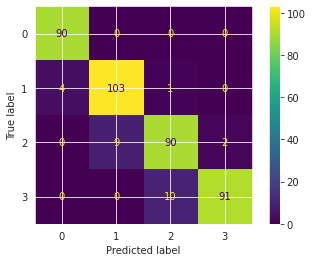

In [22]:
print_analysis(y_test, y_test_pred)

### Классификация методом случайного леса

In [79]:
from sklearn.ensemble import RandomForestClassifier
columns = ['n_estimators', 'score']
experiment = pd.DataFrame(columns=columns)
for n_estimators in range(20, 200, 20):
    rfc = RandomForestClassifier(n_estimators=n_estimators)
    rfc.fit(X_train, y_train)
    experiment = pd.concat([experiment, pd.DataFrame([[n_estimators, rfc.score(X_test, y_test)]],
                                                     columns=columns)], ignore_index=True)


In [80]:
experiment

,n_estimators,score
0,20,0.8150
1,40,0.8875
2,60,0.8650
3,80,0.8700
4,100,0.8850
5,120,0.8925
6,140,0.8900
7,160,0.8900
8,180,0.8900


In [81]:
optimal_num_of_estimators = experiment.loc[experiment.score.argmax(), 'n_estimators']

In [82]:
optimal_num_of_estimators

120

In [83]:
rfc = RandomForestClassifier(n_estimators=optimal_num_of_estimators)
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91        90
           1       0.89      0.77      0.83       108
           2       0.84      0.86      0.85       101
           3       0.95      0.91      0.93       101

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



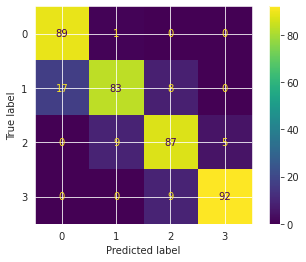

In [84]:
print_analysis(y_test, y_test_pred)

#### Классификация методом гарадиентного бустинга

In [85]:
columns = ['n_estimators', 'score']
experiment = pd.DataFrame(columns=columns)
for n_estimators in range(10, 200, 20):
    boost = GradientBoostingClassifier(n_estimators=n_estimators)
    boost.fit(X_train, y_train)
    experiment = pd.concat([experiment, pd.DataFrame([[n_estimators, boost.score(X_test, y_test)]],
                                                     columns=columns)], ignore_index=True)

In [86]:
optimal_num_of_estimators = experiment.loc[experiment.score.argmax(), 'n_estimators']

In [87]:
experiment

,n_estimators,score
0,10,0.8275
1,30,0.8825
2,50,0.9075
3,70,0.9025
4,90,0.9150
5,110,0.9200
6,130,0.9225
7,150,0.9250
8,170,0.9225
9,190,0.9225


In [88]:
optimal_num_of_estimators

150

In [89]:
boost = GradientBoostingClassifier(n_estimators=optimal_num_of_estimators)
boost.fit(X_train, y_train)
y_test_pred = boost.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        90
           1       0.93      0.88      0.90       108
           2       0.88      0.91      0.90       101
           3       0.97      0.93      0.95       101

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.92       400



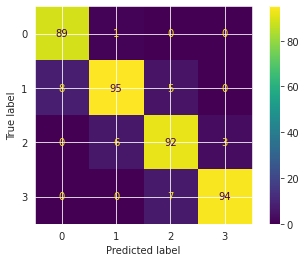

In [90]:
print_analysis(y_test, y_test_pred)

### Вывод
Таким образом лучший результат был достигнут методом ближайших соседий (accuracy = 0.94 при k = 10) и методом градиентного бустинга (accuracy=0.93 при n_estimators=150)